<a href="https://colab.research.google.com/github/Rhagner97/Lending-Club/blob/main/Lending_club_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nbformat==5.10.4
!pip install nbconvert==7.16.1



In [ ]:

## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

#dataload
data_loan = pd.read_csv("loan.csv")

In [ ]:
#see the data
data_loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
data_loan.shape

(39717, 111)

In [ ]:
#getting the null values
data_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# **FROM the above analysis lots of data is null so revoving null characters **

In [ ]:
data_loan.dropna(axis = 1, how = 'all', inplace = True)
data_loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
data_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [ ]:
data_loan =data_loan[data_loan.loan_status != "Current"]
data_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
(data_loan.isna().sum()/len(data_loan.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       6.185033
emp_length                      2.677761
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           32.477901
purpose                         0.000000
title                           0.028514
zip_code                        0.000000
addr_state                      0.000000
dti             

In [ ]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  38577 no

In [ ]:
print("Mode : " + data_loan.emp_length.mode()[0])
data_loan.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

# **We can come to the conclusion that the mode value is higher than  most frequent value**

In [ ]:
data_loan.emp_length.fillna(data_loan.emp_length.mode()[0], inplace = True)
data_loan.emp_length.isna().sum()

0

In [ ]:
data_loan.emp_length.fillna(data_loan.emp_length.mode()[0], inplace = True)
data_loan.emp_length.isna().sum()

0

# **STANDERDIZE THE DATA**

In [ ]:

data_loan.int_rate = pd.to_numeric(data_loan.int_rate.apply(lambda x : x.split('%')[0]))

In [ ]:
data_loan.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65,153.45,C,C3,...,NaN,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# **Outlier boxplot**

<Axes: ylabel='annual_inc'>

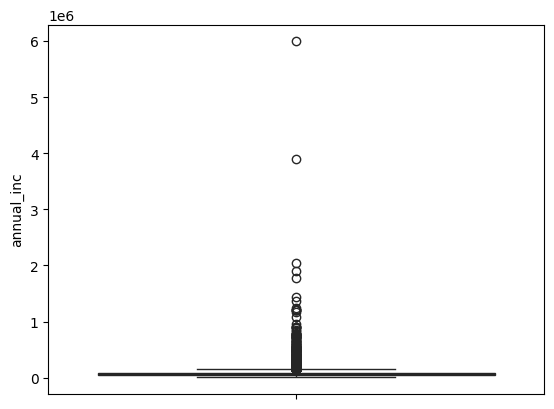

In [ ]:

sns.boxplot(data_loan['annual_inc'], color ="green")

In [ ]:

quantile = data_loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [ ]:

per_95_annual_inc = data_loan['annual_inc'].quantile(0.95)
data_loan = data_loan[data_loan.annual_inc <= per_95_annual_inc]

# **Now the "annual_inc" data looks good**

<Axes: ylabel='dti'>

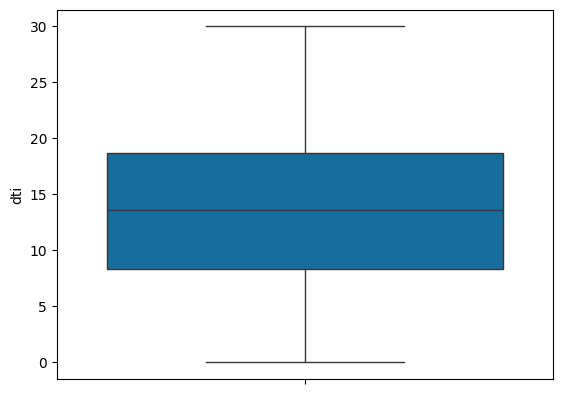

In [ ]:
sns.boxplot(data_loan.dti)

<Axes: ylabel='loan_amnt'>

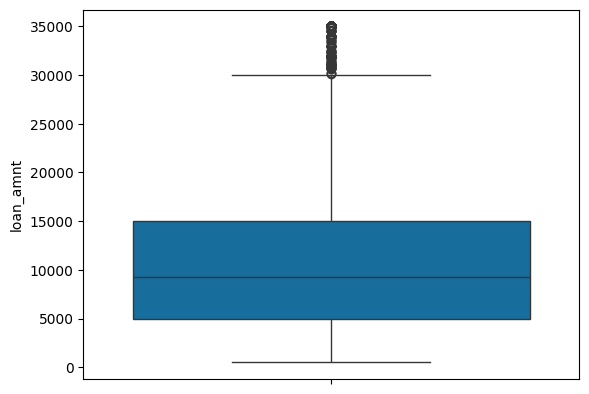

In [ ]:
sns.boxplot(data_loan.loan_amnt)

In [ ]:
data_loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='funded_amnt_inv'>

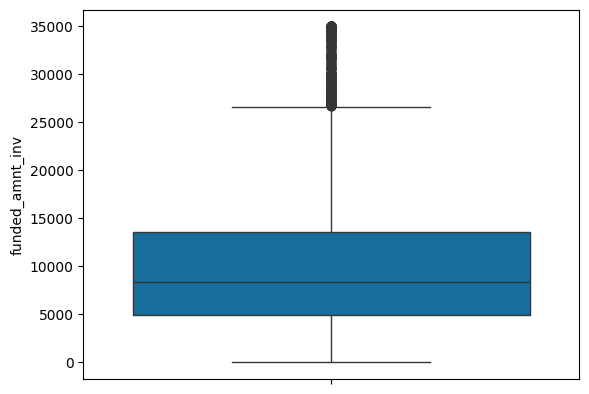

In [ ]:
sns.boxplot(data_loan.funded_amnt_inv)

In [ ]:

data_loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8375.000000
0.750    13623.731415
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.985    29925.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

# **Visualizing Categorical Data**

In [ ]:
data_loan.sub_grade = pd.to_numeric(data_loan.sub_grade.apply(lambda x : x[-1]))
data_loan.sub_grade.head(5)

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

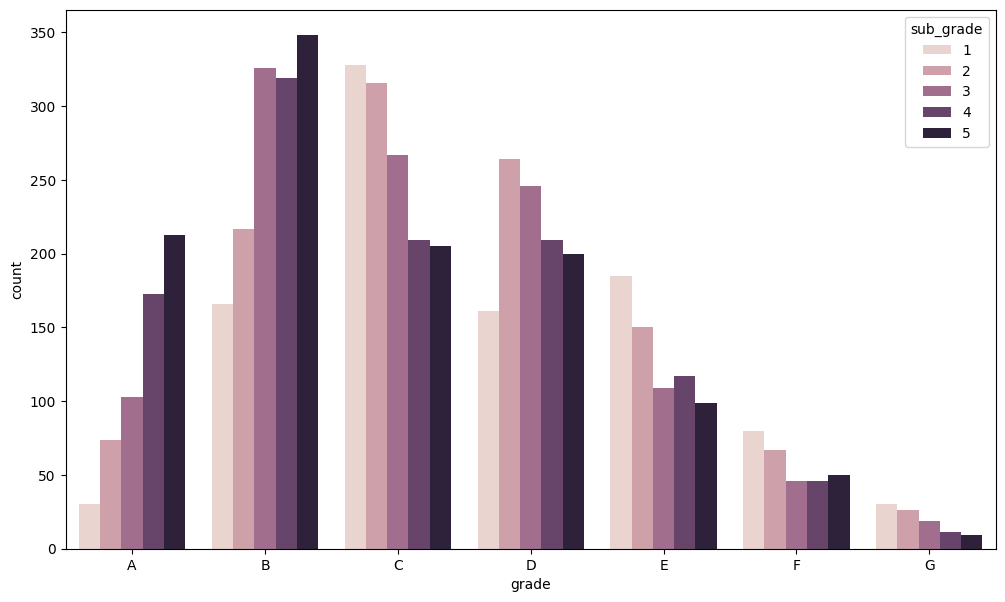

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = data_loan[data_loan.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

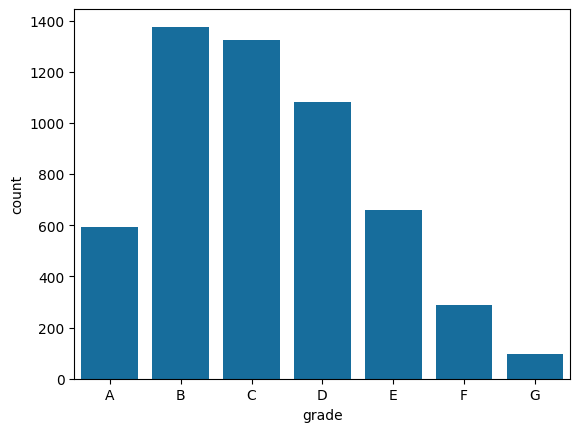

In [ ]:
sns.countplot(x = 'grade', data = data_loan[data_loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
data_loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [ ]:
# replacing none values
data_loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

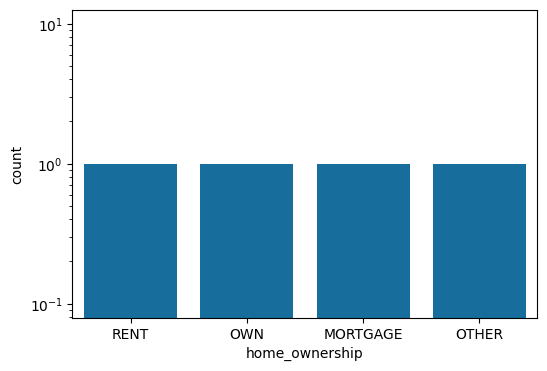

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=data_loan[data_loan['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

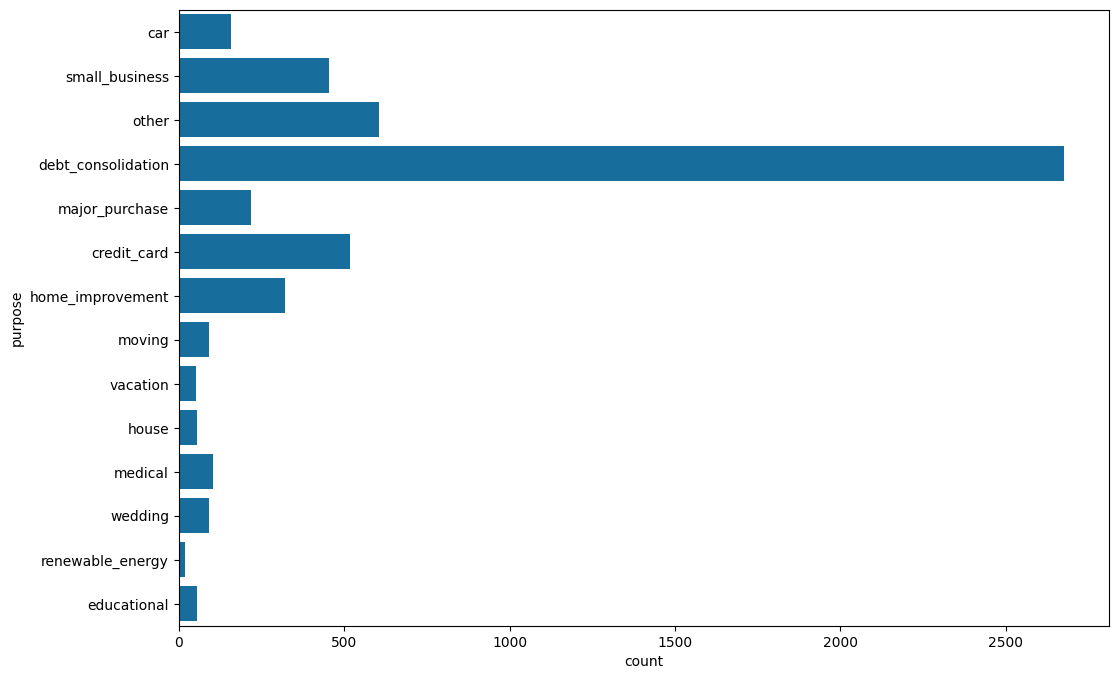

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'linear')
sns.countplot(y ='purpose', data=data_loan[data_loan.loan_status == 'Charged Off'])

In [ ]:
#creating bins for int_rate,open_acc,total_acc
data_loan['int_rate_groups'] = pd.cut(data_loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data_loan['open_acc_groups'] = pd.cut(data_loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
data_loan['total_acc_groups'] = pd.cut(data_loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
data_loan['annual_inc_groups'] = pd.cut(data_loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

# **Intrest rate wrt bins**

<Axes: xlabel='emp_length', ylabel='count'>

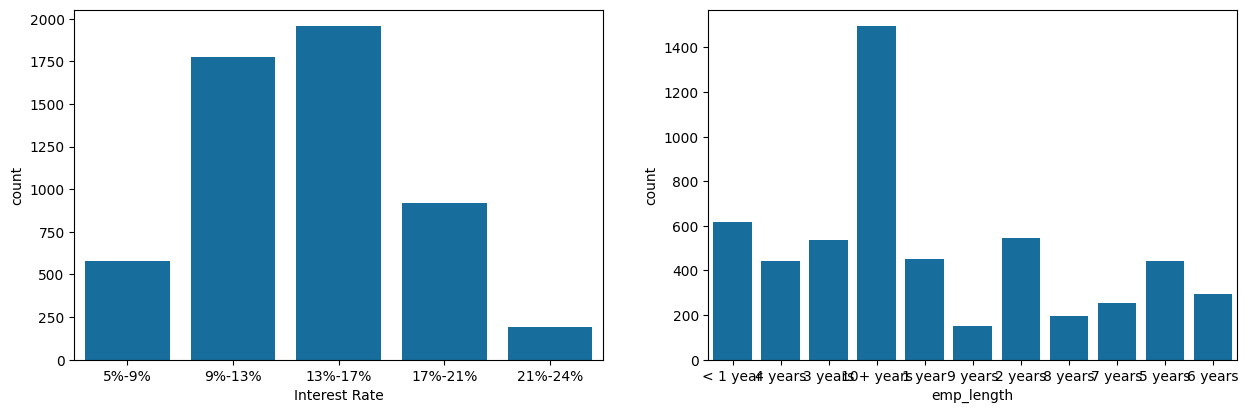

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=data_loan[data_loan.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

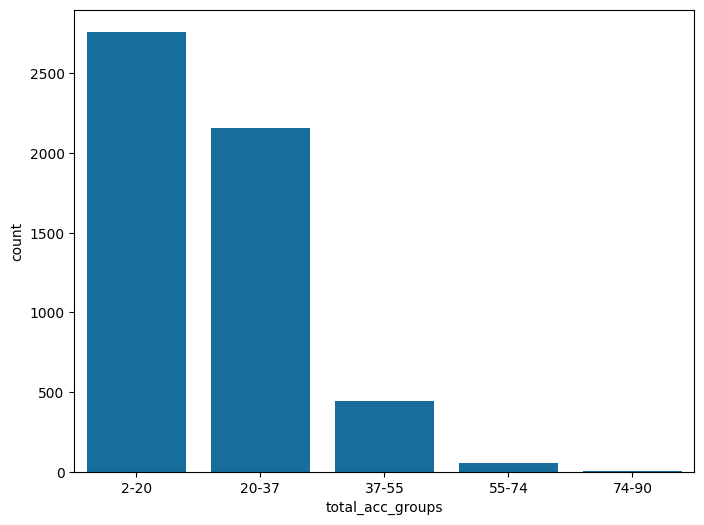

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('linear')
sns.countplot(x='total_acc_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

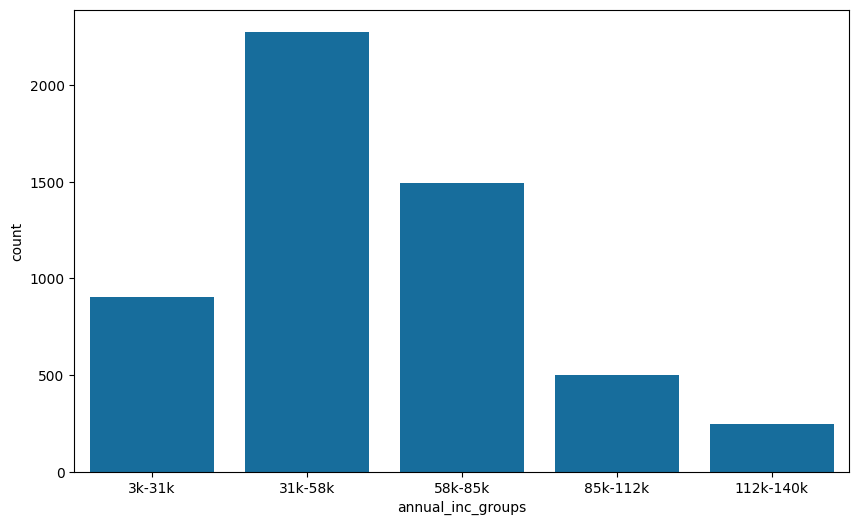

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=data_loan[data_loan.loan_status == 'Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

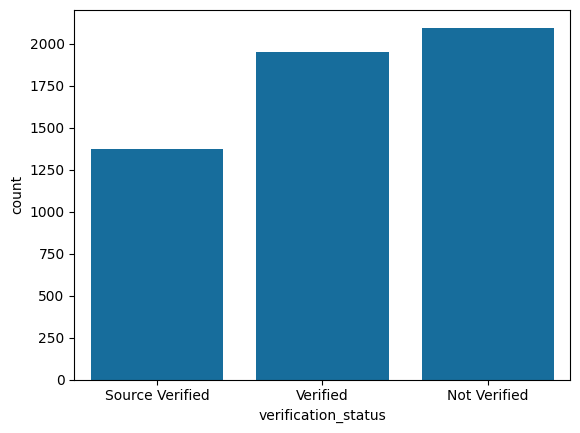

In [ ]:
sns.countplot(x='verification_status', data=data_loan[data_loan['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='term'>

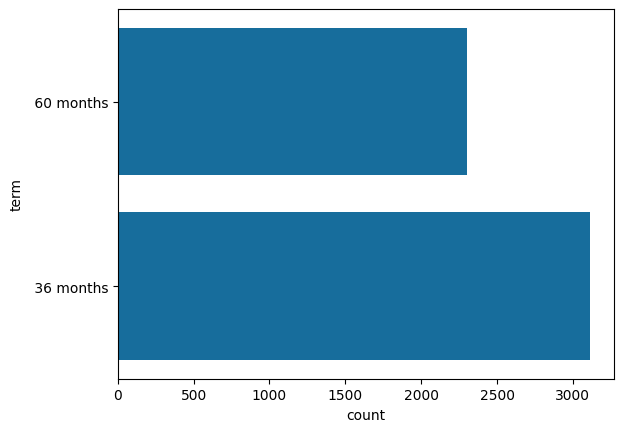

In [ ]:
sns.countplot(y='term', data=data_loan[data_loan['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

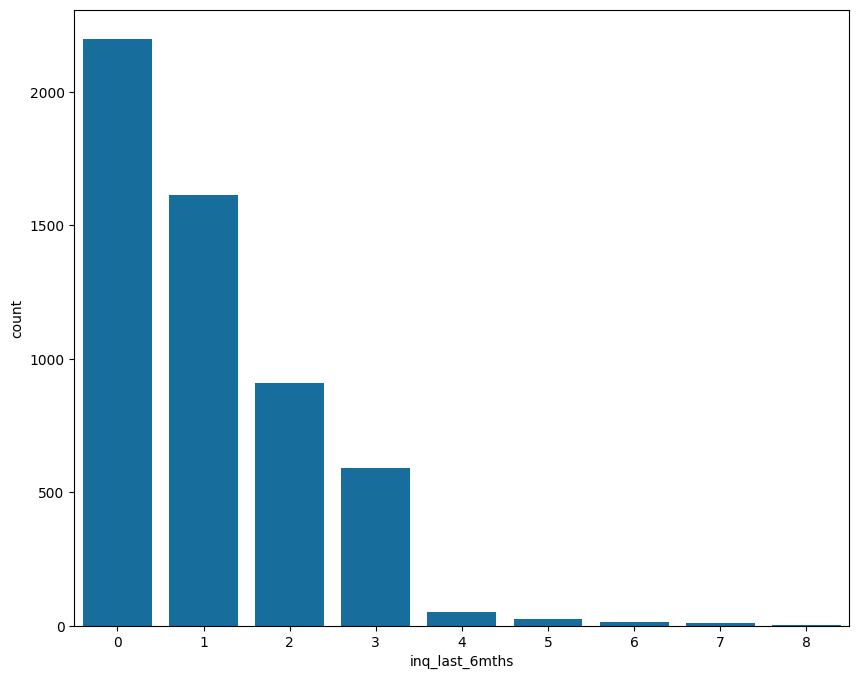

In [ ]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('linear')
sns.countplot(x='inq_last_6mths', data=data_loan[data_loan['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

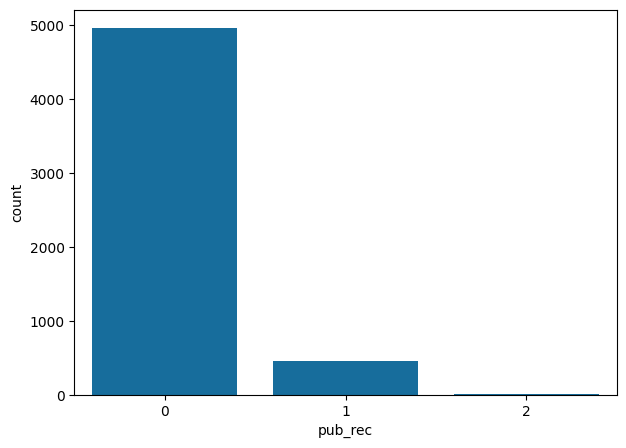

In [ ]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('linear')
sns.countplot(x='pub_rec', data=data_loan[data_loan['loan_status']=='Charged Off'])

In [ ]:
df_month_year = data_loan['issue_d'].str.partition("-", True)
data_loan['issue_month']=df_month_year[0]
data_loan['issue_year']='20' + df_month_year[2]


<Axes: xlabel='issue_year', ylabel='count'>

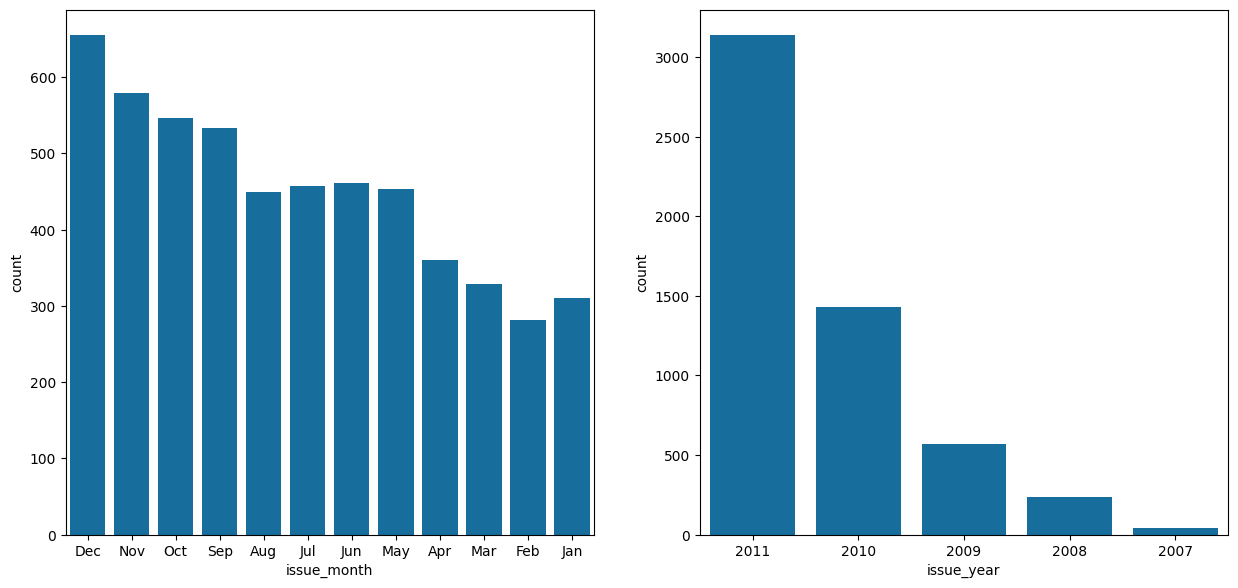

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=data_loan[data_loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=data_loan[data_loan['loan_status']=='Charged Off'])

# **Maximum number of defaults occured when the loan was sanctioned/issued in December Loan issued in the year 2011 were also as compared to other
Analyzing installment,dti, loan_amnt
**

In [ ]:
data_loan['installment_groups'] = pd.cut(data_loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data_loan['funded_amnt_inv_group'] = pd.cut(data_loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data_loan['loan_amnt_groups'] = pd.cut(data_loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data_loan['dti_groups'] = pd.cut(data_loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

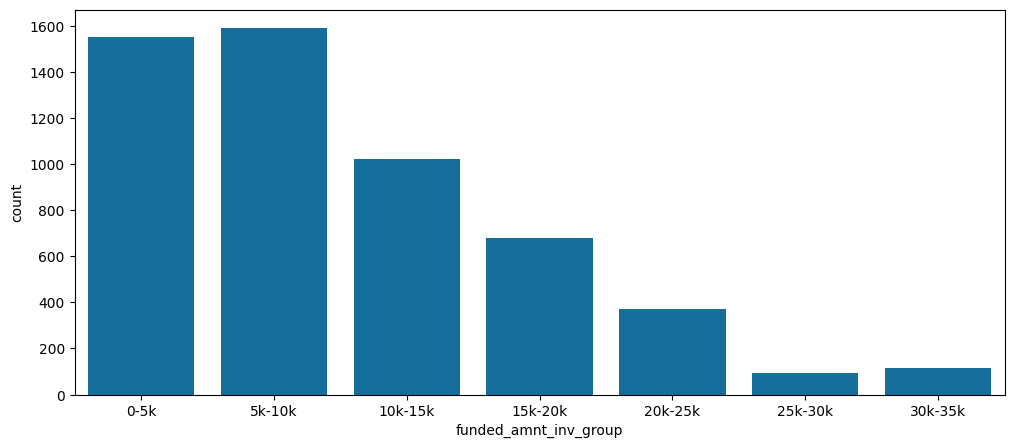

In [ ]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('linear')
sns.countplot(x='funded_amnt_inv_group', data=data_loan[data_loan['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

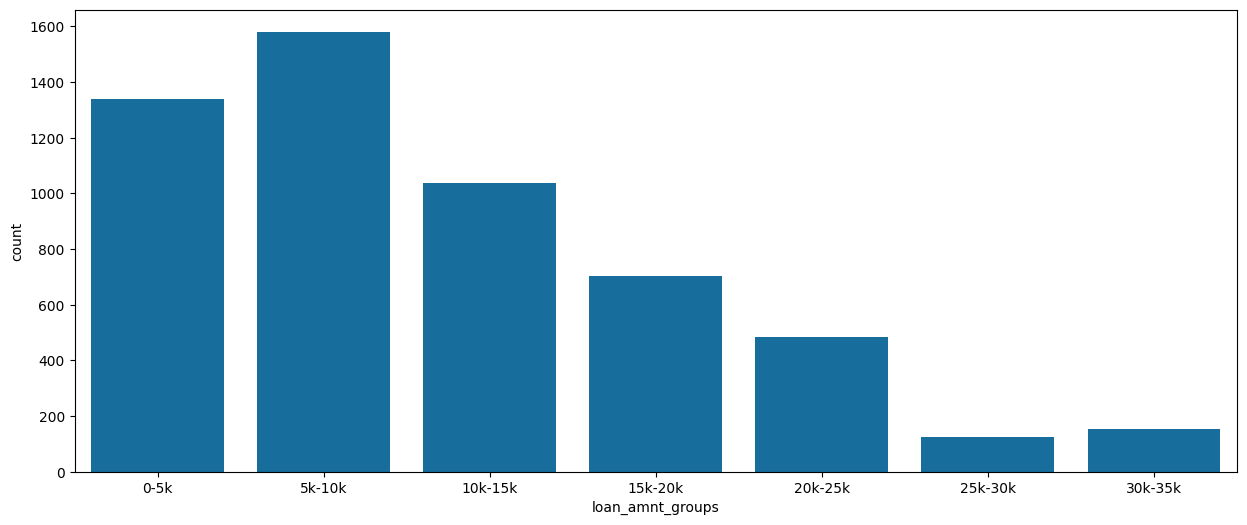

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('linear')
sns.countplot(x='loan_amnt_groups', data=data_loan[data_loan['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

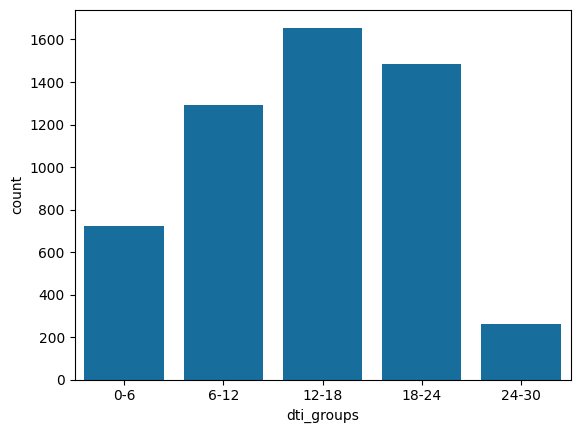

In [ ]:
sns.countplot(x='dti_groups', data=data_loan[data_loan['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

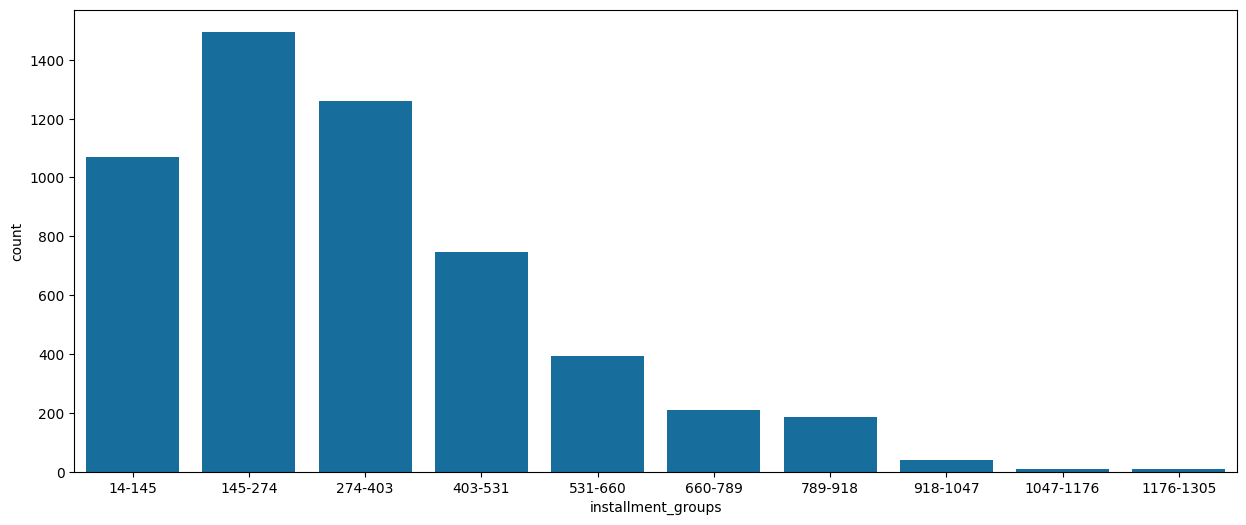

In [ ]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('linear')
sns.countplot(x='installment_groups', data=data_loan[data_loan['loan_status']=='Charged Off'])

# **The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :**


1.   loan is  generally charged off in istallment group 145-274
2.   5-10k is gennrally charged off

In [ ]:
numeric_columns = ['loan_amnt','funded_amnt_inv','open_acc','int_rate','installment','annual_inc','dti','pub_rec',]


In [ ]:
!pip install pandas

In [ ]:
correlation_matrix = data_loan[numeric_columns].corr()

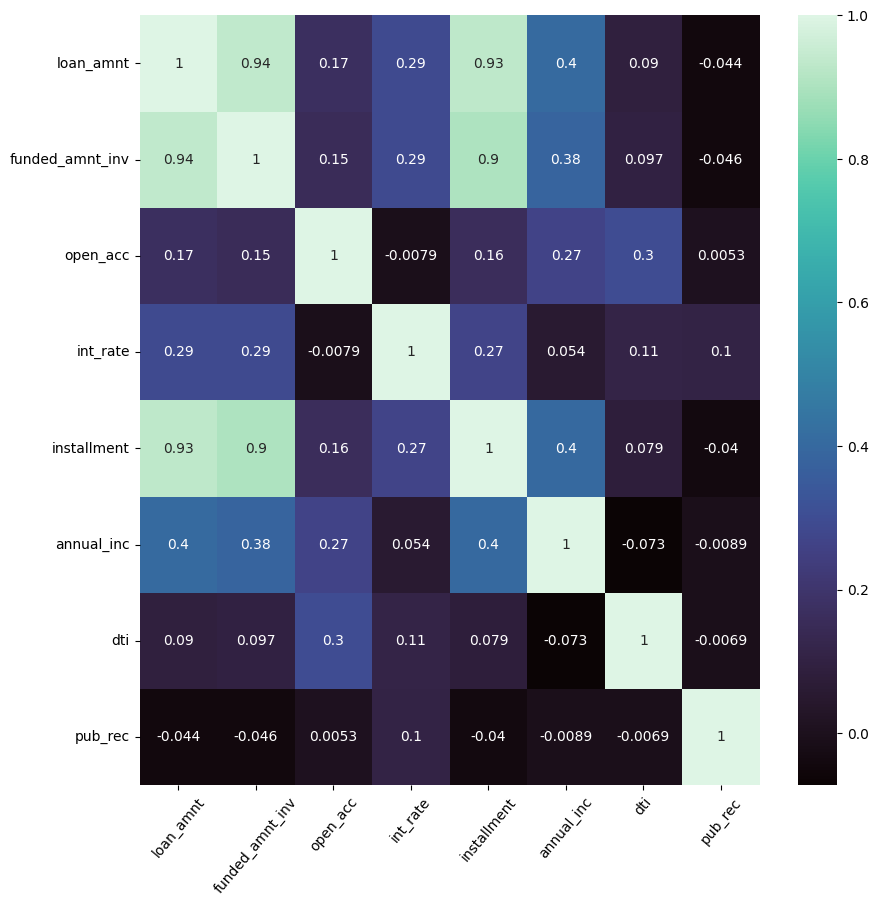

In [ ]:
f,ax = plt.subplots(figsize= (10,10))

sns.heatmap(correlation_matrix,xticklabels = correlation_matrix.columns.values,yticklabels= correlation_matrix.columns.values,
           cmap= 'mako', annot = True)
plt.xticks(rotation=50)
plt.show()

# **Loan vs income plot**

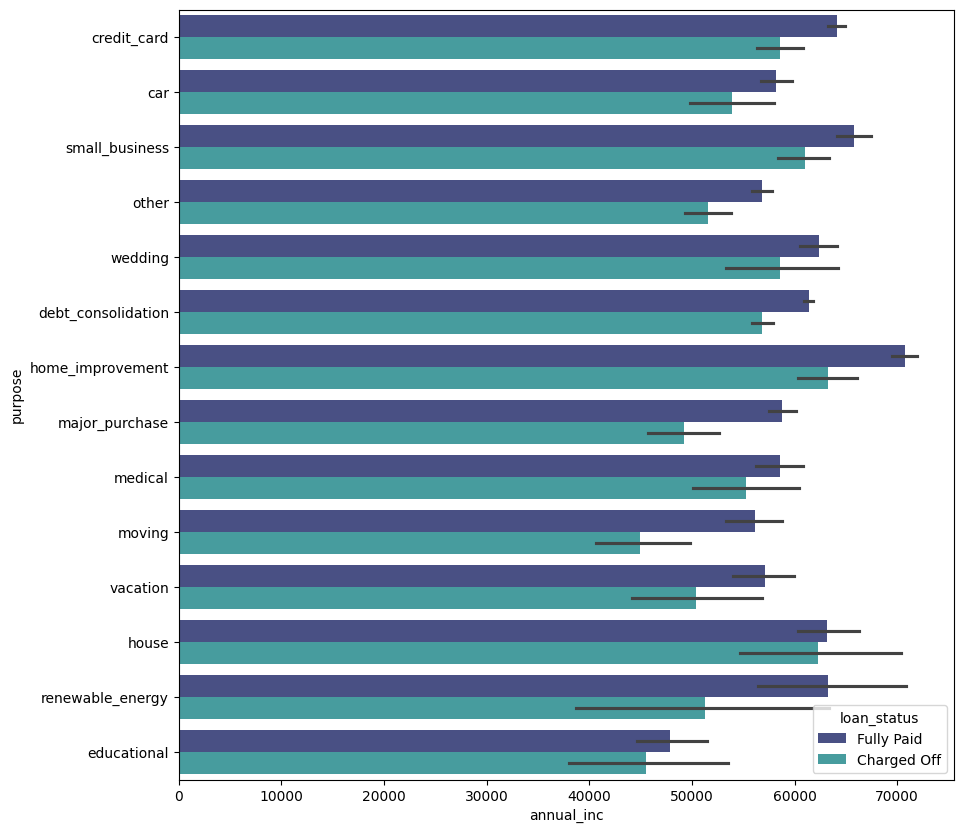

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='annual_inc', y='purpose', hue ='loan_status',palette="mako")
plt.show()

# **Loan peropose and home ownership plot**

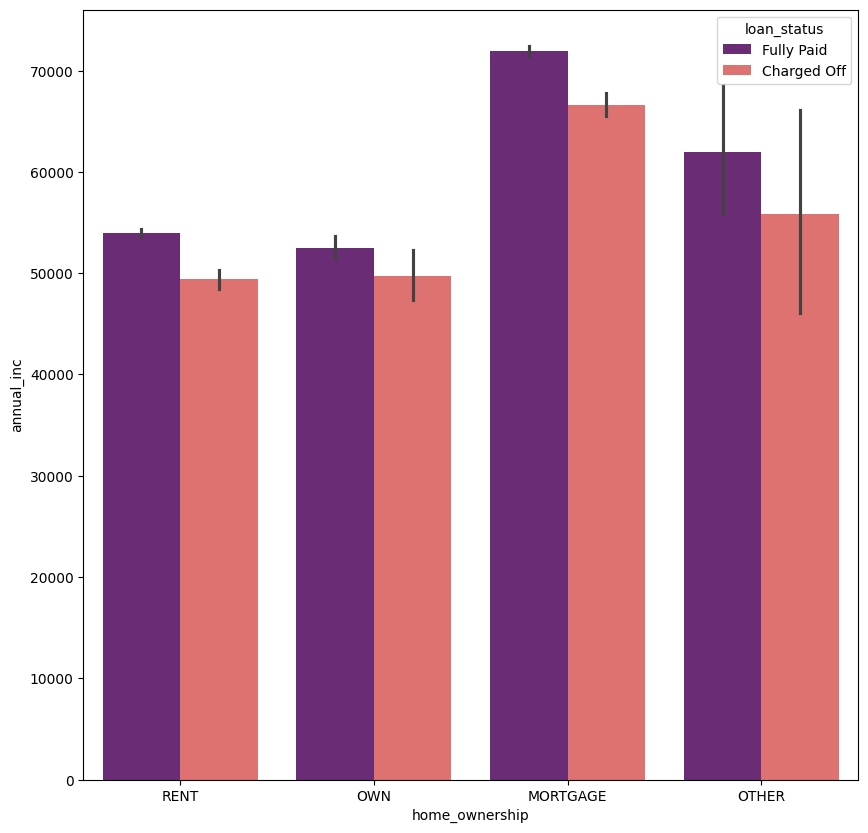

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="magma")
plt.show()

# **Annual Income and intrest rate plot**

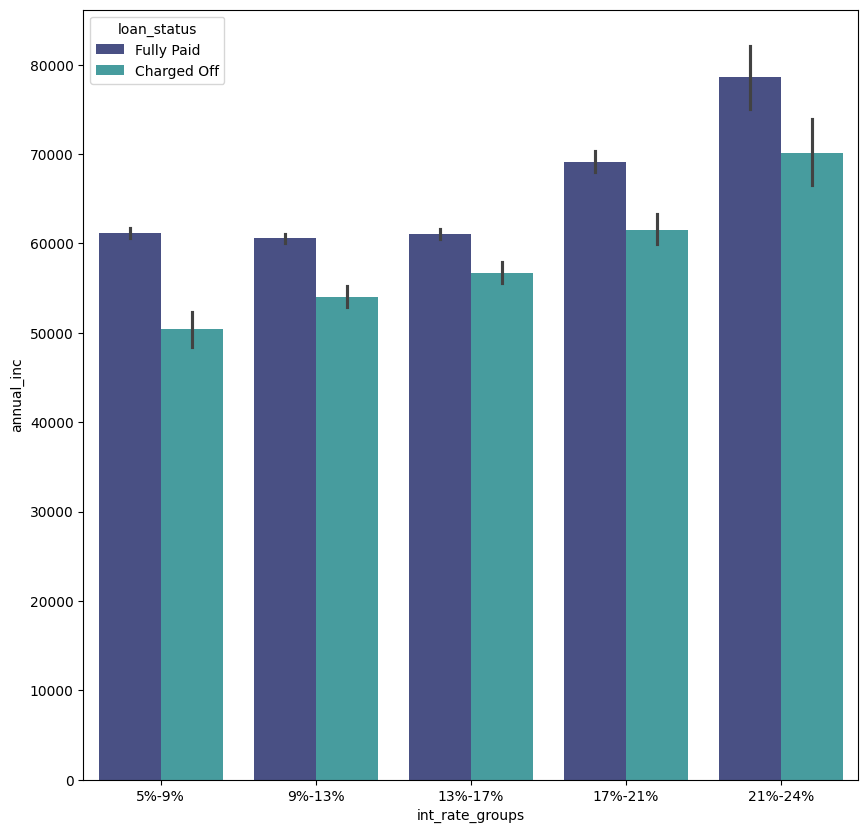

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="mako")
plt.show()

# **Loan ammount and intreast rate**

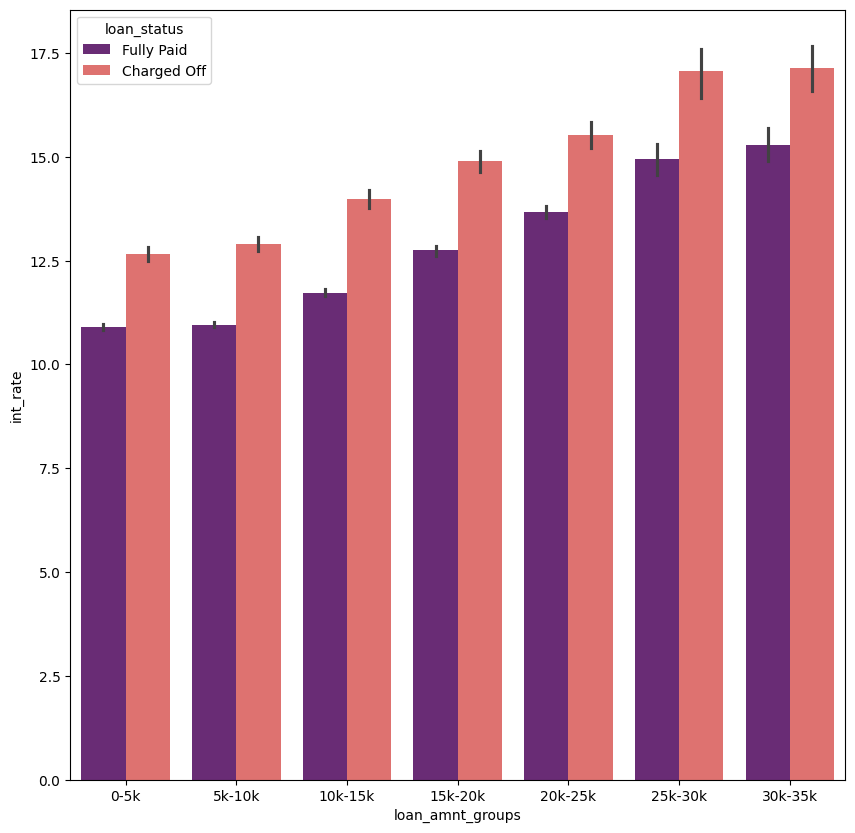

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="magma")
plt.show()

# **Loan vs House Ownership**

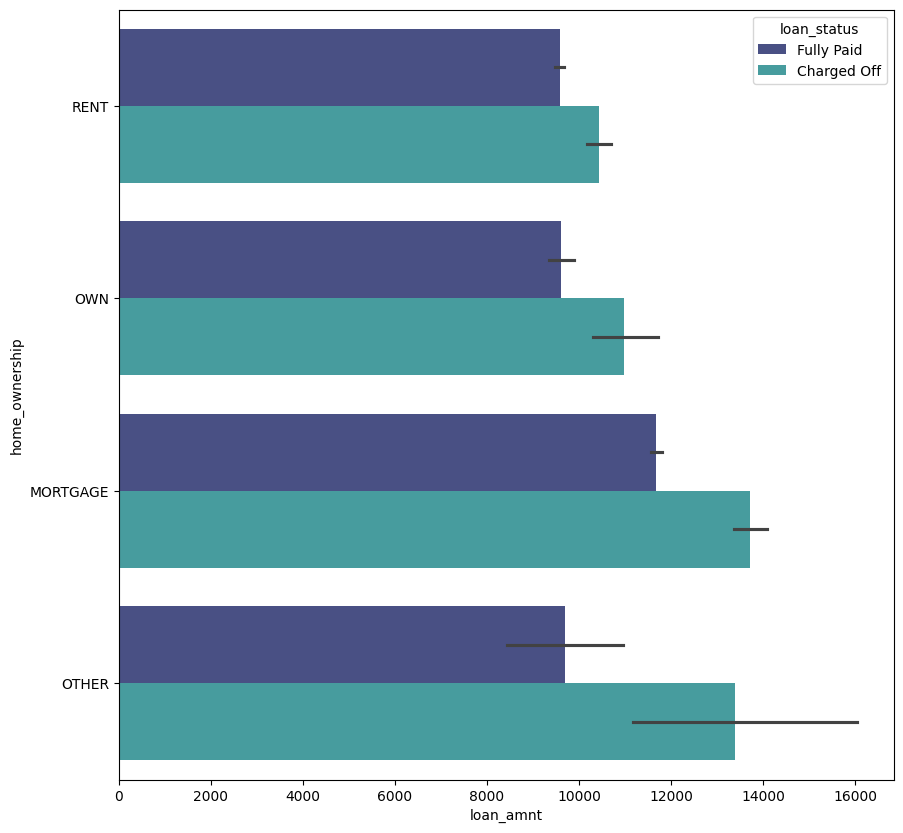

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data =data_loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="mako")
plt.show()

## **Loan amount vs month issued and year **

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

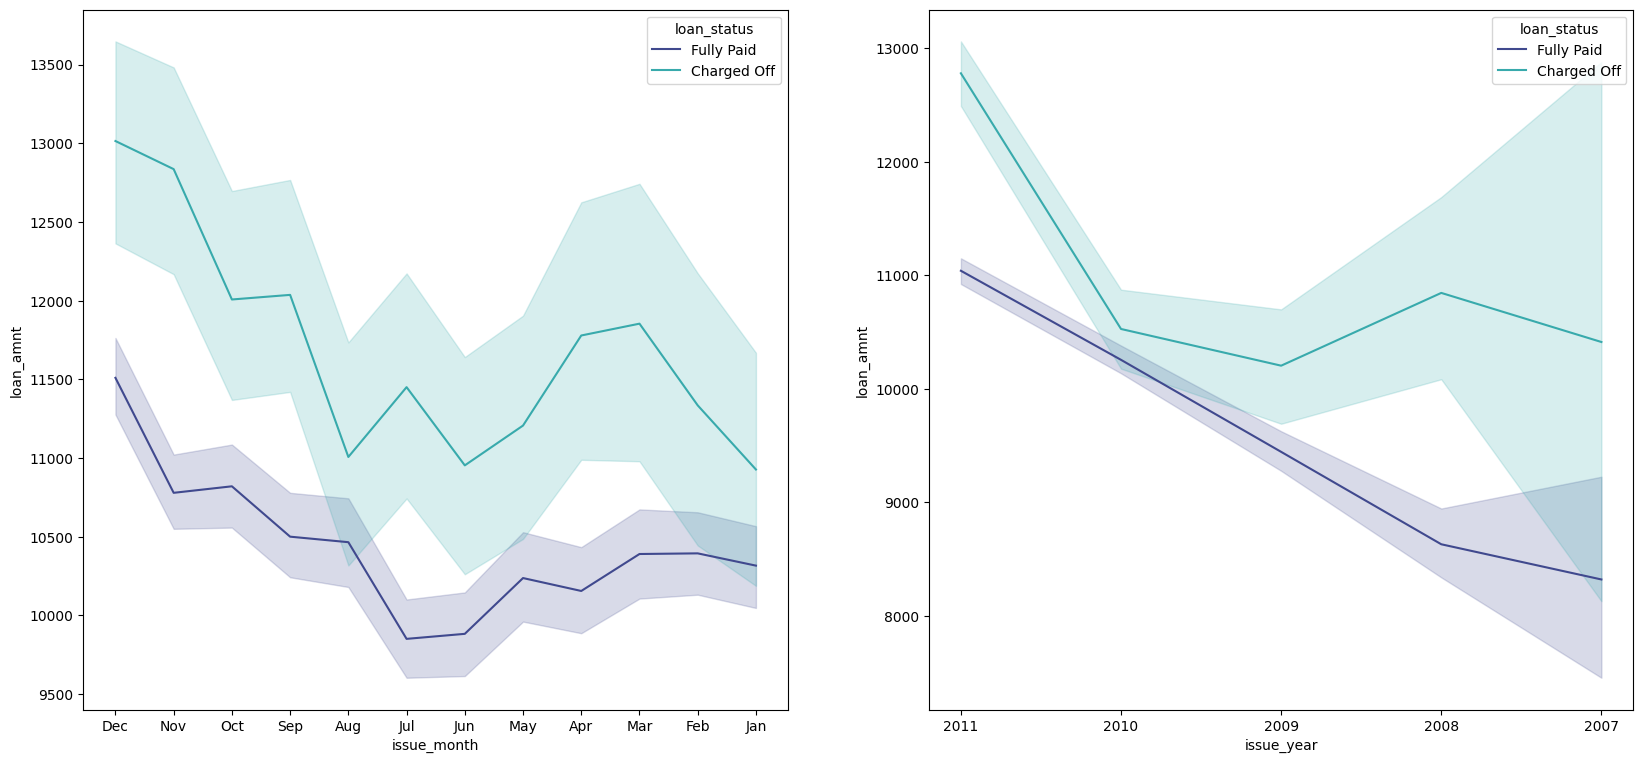

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =data_loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="mako")
plt.subplot(222)
sns.lineplot(data =data_loan,y='loan_amnt', x='issue_year', hue ='loan_status',palette="mako")

# **Observations**



*   Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k

*  Applicants taking loan for 'home improvement' and have income of 60k -70k


*  heatmap shows most of the correaltion between all the data

In [3]:
pip install nbformat


In [4]:
pip install nbconvert